<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Exercise_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


## Part 1 - Data Preprocessing

### Importing the dataset

In [59]:
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
df.shape

(10000, 14)

In [62]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [63]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [64]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2:3] = le.fit_transform(X[:,5:6].ravel()).reshape(-1, 1)

In [66]:
print(X)
X.shape

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 743 ... 0 1 112542.58]
 [502 'France' 5793 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 427 ... 1 0 92888.52]
 [792 'France' 4112 ... 1 0 38190.78]]


(10000, 10)

One Hot Encoding the "Geography" column

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ohe.fit_transform(X))

In [68]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=41)

In [70]:
print(X_train)

[[1.0 0.0 0.0 ... 1 1 146715.07]
 [1.0 0.0 0.0 ... 0 0 57817.84]
 [0.0 0.0 1.0 ... 1 0 138613.21]
 ...
 [1.0 0.0 0.0 ... 0 1 182495.7]
 [0.0 1.0 0.0 ... 1 1 34338.21]
 [0.0 0.0 1.0 ... 1 1 164741.5]]


In [71]:
print(X_test)


[[1.0 0.0 0.0 ... 1 1 8037.03]
 [1.0 0.0 0.0 ... 1 0 100717.54]
 [1.0 0.0 0.0 ... 1 1 193438.69]
 ...
 [1.0 0.0 0.0 ... 1 1 124113.04]
 [1.0 0.0 0.0 ... 1 1 56999.9]
 [0.0 0.0 1.0 ... 1 1 181449.51]]


In [72]:
print(y_train)


[0 1 0 ... 0 0 0]


In [73]:
print(y_test)


[0 0 0 ... 0 1 0]


### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

Importing some frequently and iumportant libraries for model training

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model  = Sequential()

## Part 3 - Training the ANN

In [77]:
model.add(Dense(8,activation='relu',input_dim=12))  # 1st hidden layer having 6 neurons so it will have 12+6=Bias,and 12 nodes.
model.add(Dense(8,activation='relu'))  # 2nd hidden layer connected with 1 nodal output layer will have 6+1= Bias and 6 nodes.
model.add(Dense(1,activation='sigmoid'))  # The last layer or outpt layer . Output layer in binary linear classification have sigmoid as their activation function always.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part 4 - Making the predictions and evaluating the model

In [78]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6690 - loss: 0.6369 - val_accuracy: 0.8006 - val_loss: 0.5209
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7953 - loss: 0.5154 - val_accuracy: 0.8050 - val_loss: 0.4672
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7980 - loss: 0.4703 - val_accuracy: 0.8150 - val_loss: 0.4444
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8188 - loss: 0.4330 - val_accuracy: 0.8206 - val_loss: 0.4336
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8188 - loss: 0.4299 - val_accuracy: 0.8263 - val_loss: 0.4255
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8182 - loss: 0.4266 - val_accuracy: 0.8256 - val_loss: 0.4179
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8210 - loss: 0.4161 - val_accuracy: 0.8294 - val_loss: 0.4082
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8293 - loss: 0.4084 - val_accu

In [83]:
history.history

{'accuracy': [0.7435937523841858,
  0.8003125190734863,
  0.807812511920929,
  0.8123437762260437,
  0.8179687261581421,
  0.8218749761581421,
  0.8239062428474426,
  0.8287500143051147,
  0.8345312476158142,
  0.8396875262260437,
  0.8459374904632568,
  0.8485937714576721,
  0.8487499952316284,
  0.8482812643051147,
  0.8515625,
  0.8518750071525574,
  0.8521875143051147,
  0.8543750047683716,
  0.8553125262260437,
  0.8540624976158142,
  0.8551562428474426,
  0.854687511920929,
  0.8553125262260437,
  0.854687511920929,
  0.8551562428474426,
  0.8579687476158142,
  0.8573437333106995,
  0.8575000166893005,
  0.8587499856948853,
  0.8564062714576721,
  0.859375,
  0.8573437333106995,
  0.8571875095367432,
  0.859375,
  0.8590624928474426,
  0.8579687476158142,
  0.858593761920929,
  0.8604687452316284,
  0.859375,
  0.8598437309265137,
  0.8603125214576721,
  0.8579687476158142,
  0.860156238079071,
  0.859375,
  0.8590624928474426,
  0.8604687452316284,
  0.8617187738418579,
  0.8615

In [85]:
model.layers[0].get_weights()  # Weights os the first hidden layer

[array([[ 2.52670914e-01,  4.62540314e-02, -8.21713433e-02,
         -1.89512148e-01, -1.05540447e-01,  2.51182139e-01,
         -2.24045902e-01,  2.22919226e-01],
        [-3.68704796e-01,  9.89527255e-02,  2.32588109e-02,
         -4.37775731e-01,  1.71754405e-01,  3.48472834e-01,
          2.54944533e-01,  1.00645445e-01],
        [ 3.15120757e-01, -1.76560022e-02,  4.41256016e-01,
         -6.48773909e-01, -2.28316888e-01, -1.11951721e+00,
         -3.83619368e-01,  2.13689268e-01],
        [ 2.78799832e-01, -1.22709244e-01,  6.24965993e-04,
         -2.90187985e-01, -7.72880912e-02,  1.24754086e-01,
         -2.98901871e-02,  2.01758206e-01],
        [-5.28092504e-01, -8.98832902e-02, -5.19485772e-01,
          5.29776633e-01,  6.27056733e-02, -3.07717741e-01,
         -3.62651318e-01, -5.58839023e-01],
        [-7.81407237e-01,  7.39955306e-01, -9.12074566e-01,
         -1.61273628e-01,  7.85887241e-01, -9.95802879e-01,
          2.02508301e-01,  3.49461794e-01],
        [ 1.0522

In [86]:
model.layers[1].get_weights()  # Weights os the second hidden layer


[array([[ 0.09910989,  0.03027108,  0.04660977, -0.46753684,  0.30520788,
          0.9294993 ,  0.24972965, -0.14681427],
        [ 0.13133657, -1.4440078 , -2.129514  ,  0.3112781 , -0.85741735,
          0.2717845 ,  0.4369357 ,  1.112881  ],
        [-0.5927033 , -1.213516  ,  0.3363811 , -0.2655031 , -0.31200448,
          0.6525286 ,  0.08846676, -0.28496397],
        [-0.17780425,  0.6040209 , -0.12440896,  0.03104755,  0.11480222,
         -0.26201436,  0.5482355 , -0.76050615],
        [ 0.01126397,  0.12005889,  0.39949584,  0.10686356, -0.46416947,
          0.64509124,  0.79787433, -0.47498578],
        [-0.47734877, -0.5498674 ,  0.38418886, -0.3622312 , -0.70858496,
          0.89929724, -0.31280714, -0.3719824 ],
        [ 0.81072235, -0.36393768,  0.44486064,  0.5705536 ,  0.43576318,
         -0.10471743, -0.20347886, -1.6224389 ],
        [ 0.1664304 ,  0.38837034,  0.49171644, -1.6919458 ,  0.6620124 ,
         -0.22325477,  0.13571908, -0.83370996]], dtype=float32),

In [88]:
y_log= model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [89]:
y_pred = np.where(y_log>0.5,1,0)   # As we know Sigmoid af output is in probability so to get it in 1,0 we use np.where
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.8635


### Predicting the result of a single observation

In [90]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[False]]




Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [91]:
y_pred = np.where(y_log>0.5,1,0)   # As we know Sigmoid af output is in probability so to get it in 1,0 we use np.where


### Making the Confusion Matrix

[[1519   78]
 [ 195  208]]
0.8635


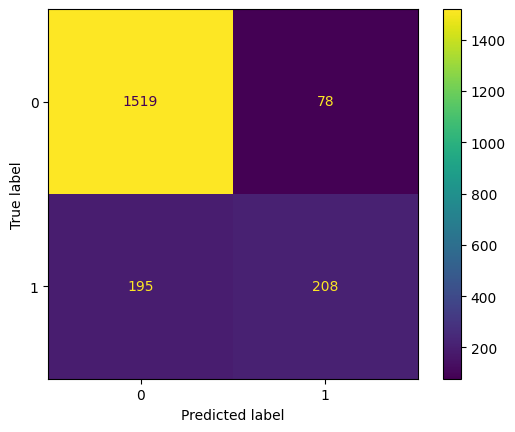

In [95]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)